Task 4 - Time Series Breakdown of Retail Sales

In [1]:
import pandas as pd
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
features = pd.read_csv(r"C:\Users\Lenovo\Downloads\walmart sales\features.csv")
stores = pd.read_csv(r"C:\Users\Lenovo\Downloads\walmart sales\stores.csv")
test = pd.read_csv(r"C:\Users\Lenovo\Downloads\walmart sales\test.csv")
train = pd.read_csv(r"C:\Users\Lenovo\Downloads\walmart sales\train.csv")

In [5]:
features.info()

<class 'pandas.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   str    
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), str(1)
memory usage: 712.0 KB


In [7]:
stores.info()

<class 'pandas.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Store   45 non-null     int64
 1   Type    45 non-null     str  
 2   Size    45 non-null     int64
dtypes: int64(2), str(1)
memory usage: 1.2 KB


In [8]:
test.info()

<class 'pandas.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Store      115064 non-null  int64
 1   Dept       115064 non-null  int64
 2   Date       115064 non-null  str  
 3   IsHoliday  115064 non-null  bool 
dtypes: bool(1), int64(2), str(1)
memory usage: 2.7 MB


In [9]:
train.info()

<class 'pandas.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  str    
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), str(1)
memory usage: 13.3 MB


In [12]:
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])

In [13]:
df = train.merge(
    features,
    on=['Store', 'Date', 'IsHoliday'],
    how='left'
)
df = df.merge(
    stores,
    on='Store',
    how='left'
)

In [14]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum().reset_index()

In [16]:
monthly_sales.head()

,Month,Weekly_Sales
0,2010-02,1.903330e+08
1,2010-03,1.819198e+08
2,2010-04,2.314124e+08
3,2010-05,1.867109e+08
4,2010-06,1.922462e+08


In [18]:
monthly_sales['Rolling_3'] = monthly_sales['Weekly_Sales'].rolling(3).mean()
monthly_sales['Rolling_3'].head().reset_index(name = 'sales')

,index,sales
0,0,NaN
1,1,NaN
2,2,2.012217e+08
3,3,2.000144e+08
4,4,2.034565e+08


In [20]:
df['Month_Num'] = df['Date'].dt.month
seasonality = df.groupby('Month_Num')['Weekly_Sales'].mean()
seasonality.head().reset_index(name = 'sales')

,Month_Num,sales
0,1,14126.075111
1,2,16008.779217
2,3,15416.657597
3,4,15650.338357
4,5,15776.337202


In [22]:
dept_sales = df.groupby(['Month', 'Dept'])['Weekly_Sales'].sum().reset_index()
dept_sales.head()

,Month,Dept,Weekly_Sales
0,2010-02,1,4138664.75
1,2010-02,2,7658267.17
2,2010-02,3,1739169.28
3,2010-02,4,4470499.52
4,2010-02,5,4231371.27


In [23]:
type_sales = df.groupby(['Month', 'Type'])['Weekly_Sales'].sum().reset_index()
dept_sales.head()

,Month,Dept,Weekly_Sales
0,2010-02,1,4138664.75
1,2010-02,2,7658267.17
2,2010-02,3,1739169.28
3,2010-02,4,4470499.52
4,2010-02,5,4231371.27


In [27]:
monthly_sales['Forecast'] = monthly_sales['Weekly_Sales'].rolling(6).mean()

In [ ]:
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])
monthly_sales = monthly_sales.sort_values('Month')
monthly_sales.set_index('Month', inplace=True)

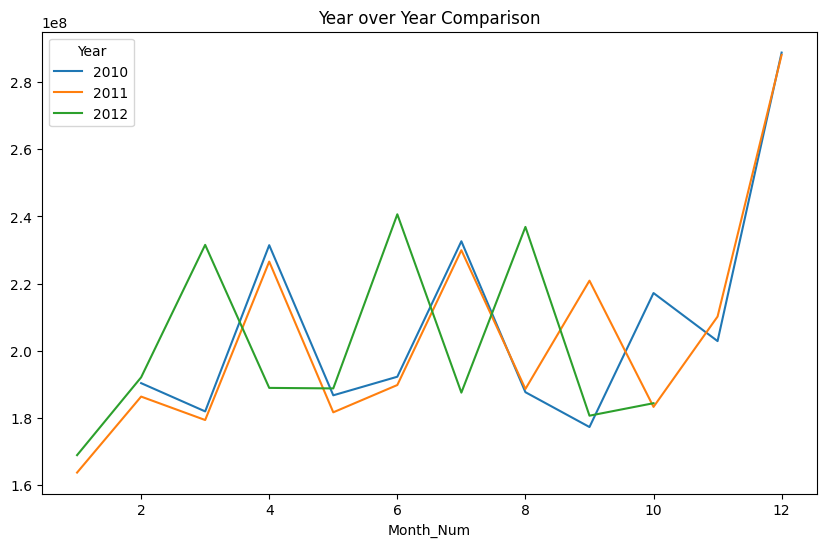

In [56]:
monthly_sales['Year'] = monthly_sales.index.year
monthly_sales['Month_Num'] = monthly_sales.index.month

yoy = monthly_sales.pivot_table(
    values='Weekly_Sales',
    index='Month_Num',
    columns='Year',
    aggfunc='sum'
)

yoy.plot(figsize=(10,6))
plt.title("Year over Year Comparison")
plt.show()

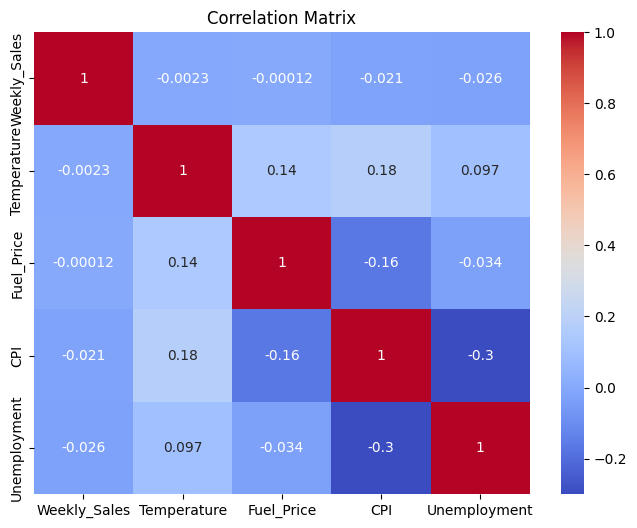

In [57]:
import seaborn as sns

corr = df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

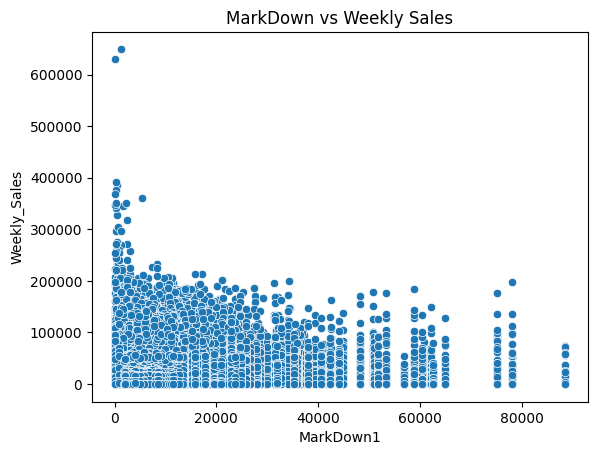

In [58]:
sns.scatterplot(data=df, x='MarkDown1', y='Weekly_Sales')
plt.title("MarkDown vs Weekly Sales")
plt.show()

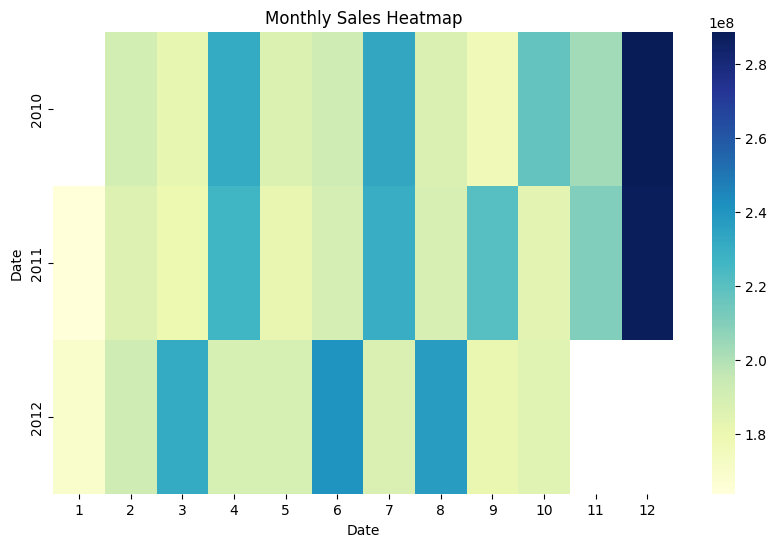

In [62]:
pivot = df.pivot_table(
    values='Weekly_Sales',
    index=df['Date'].dt.year,
    columns=df['Date'].dt.month,
    aggfunc='sum'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title("Monthly Sales Heatmap")
plt.show()

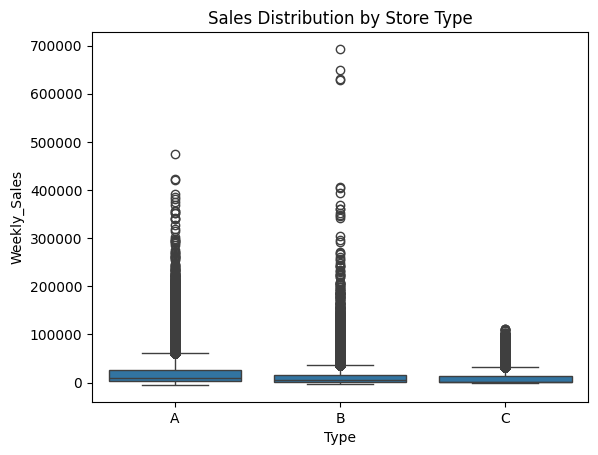

In [61]:
sns.boxplot(data=df, x='Type', y='Weekly_Sales')
plt.title("Sales Distribution by Store Type")
plt.show()

In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(
    monthly_sales['Weekly_Sales'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

monthly_sales['Exp_Smoothing'] = model.fittedvalues

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


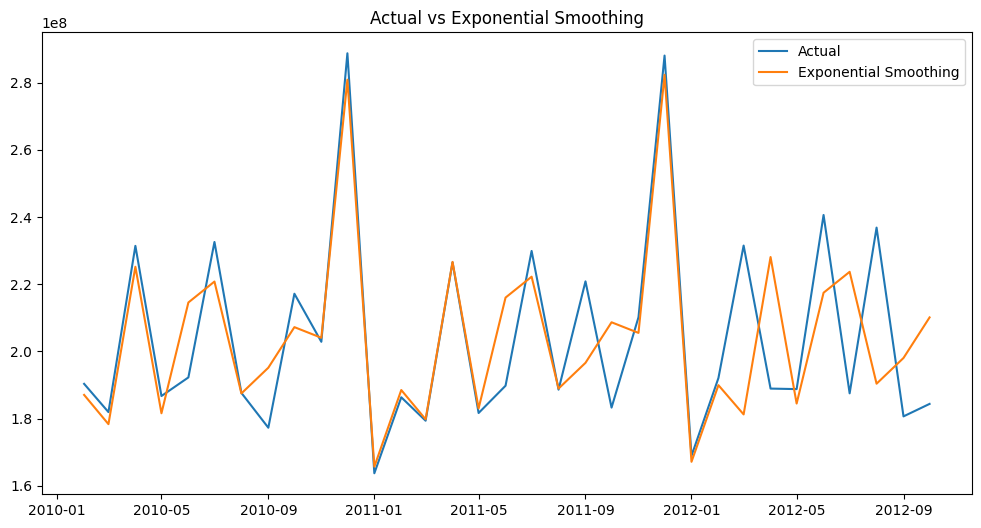

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Weekly_Sales'], label='Actual')
plt.plot(monthly_sales['Exp_Smoothing'], label='Exponential Smoothing')
plt.legend()
plt.title('Actual vs Exponential Smoothing')
plt.show()